# Detecting Malicious URLs using Machine Learning

Import appropriate packages.

In [161]:
# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Measuring Accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_roc_curve
import matplotlib.pyplot as plt 

# Data processing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import joblib

# Save and load models
import pickle

# Managing Datasets
import pandas as pd
# Extra Graphs
import seaborn as sns
# Maths
import numpy as np

Scale the data to accomodate to some ML models such as KNN.

In [162]:
ml_data = pd.read_csv("ml_data/ml_data.csv")
ml_data

,label,port,ip_1,ip_2,ip_3,ip_4,contains [,contains ],contains {,contains },...,x_powered_by_W3 Total Cache/0.11.0,x_powered_by_WordPress VIP <https://wpvip.com>,x_powered_by_science!,x_powered_by_nan,expires_year,expires_month,expires_day,asn_date_year,asn_date_month,asn_date_day
0,0,80,172.0,217.0,169.0,33.0,0,0,0,0,...,0,0,0,0,2021.0,3.0,16.0,2012.0,4.0,16.0
1,0,80,205.0,178.0,189.0,131.0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,1999.0,2.0,9.0
2,0,80,92.0,242.0,132.0,24.0,0,0,0,0,...,0,0,0,0,2021.0,3.0,16.0,2007.0,12.0,27.0
3,0,443,52.0,198.0,17.0,132.0,0,0,0,0,...,0,0,0,0,1984.0,1.0,11.0,2015.0,9.0,2.0
4,0,80,54.0,241.0,17.0,98.0,0,0,0,0,...,0,0,0,1,0.0,0.0,0.0,2012.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,49963,219.0,155.0,98.0,60.0,0,0,0,0,...,0,0,0,0,2021.0,3.0,16.0,2002.0,3.0,21.0
396,1,44360,59.0,23.0,39.0,209.0,0,0,0,0,...,0,0,0,1,0.0,0.0,0.0,2004.0,8.0,2.0
397,1,57652,103.0,235.0,165.0,165.0,0,0,0,0,...,0,0,0,1,0.0,0.0,0.0,2016.0,9.0,14.0
398,1,37194,116.0,74.0,242.0,71.0,0,0,0,0,...,0,0,0,1,0.0,0.0,0.0,2007.0,5.0,4.0


In [163]:
scaler = StandardScaler()
y = ml_data['label']
ml_data = ml_data.drop('label', axis=1)
x = scaler.fit_transform(ml_data)

In [164]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [165]:
x_train

array([[-0.58092082, -1.26451271, -1.27574734, ..., -1.91076799,
        -1.23743023, -1.23294685],
       [ 1.56503928,  0.38232095, -0.6343594 , ...,  0.52218147,
         0.38618956, -0.57811924],
       [-0.58092082,  1.006982  ,  0.90497166, ...,  0.53066287,
         0.61813525, -0.29747883],
       ...,
       [-0.56328598, -1.26451271, -1.27574734, ..., -1.91076799,
        -1.23743023, -1.23294685],
       [ 2.29890099,  0.33973043, -0.94436357, ...,  0.52218147,
         1.54591799,  0.17025518],
       [-0.56328598, -1.26451271, -1.27574734, ..., -1.91076799,
        -1.23743023, -1.23294685]])

## Models

### Random Forest

In [166]:
## TODO might not need these starting bits

# Initialise the model
rfc = RandomForestClassifier()

# Train the model on the training data and the training data survivors
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [167]:
# RF hyperparameters
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(x_train, y_train)

print(grid_search.best_params_)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed:  4.6min finished


{'bootstrap': True, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 200}


In [168]:
# Make a new Random Forest model based on the best parameters found before
rfc = RandomForestClassifier(**grid_search.best_params_)

# Fit the model to the training data
rfc.fit(x_train, y_train)

# Get a predicition from the test data
pred = rfc.predict(x_test)

# Generate an accuracy from the prediction
rfc_acc = accuracy_score(y_test, pred)

print(rfc_acc)

0.8583333333333333


In [169]:
rfc_confusion = confusion_matrix(y_test, pred)
print(rfc_confusion)

[[55 10]
 [ 7 48]]


In [170]:
rfc_classification = classification_report(y_test, pred, output_dict=True)
print(rfc_classification)

{'0': {'precision': 0.8870967741935484, 'recall': 0.8461538461538461, 'f1-score': 0.8661417322834646, 'support': 65}, '1': {'precision': 0.8275862068965517, 'recall': 0.8727272727272727, 'f1-score': 0.8495575221238938, 'support': 55}, 'accuracy': 0.8583333333333333, 'macro avg': {'precision': 0.85734149054505, 'recall': 0.8594405594405594, 'f1-score': 0.8578496272036792, 'support': 120}, 'weighted avg': {'precision': 0.8598210975157582, 'recall': 0.8583333333333333, 'f1-score': 0.858540635960328, 'support': 120}}


### Logistic Regression

In [171]:
# Initialise the model
lr = LogisticRegression()

# Fit the model with the training data
lr.fit(x_train, y_train)

LogisticRegression()

In [172]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter':[100, 500, 1000, 5000, 10000],
    'C': [0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(estimator = LogisticRegression(), param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(x_train, y_train)

print(grid_search.best_params_)

Fitting 3 folds for each of 375 candidates, totalling 1125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1069 tasks      | elapsed:   27.5s


{'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 1125 out of 1125 | elapsed:   33.4s finished


In [173]:
# Make a new Logistic Regression model based on the best parameters found before
lr = LogisticRegression(**grid_search.best_params_)

# Fit the model with the training data
lr.fit(x_train, y_train)

# Predict with the test data
pred = lr.predict(x_test)

# Get an accuracy score with the predicition
lr_acc = accuracy_score(y_test, pred)

print(lr_acc)

0.875


In [174]:
lr_confusion = confusion_matrix(y_test, pred)
print(lr_confusion)

[[54 11]
 [ 4 51]]


In [175]:
lr_classification = classification_report(y_test, pred, output_dict=True)
print(lr_classification)

{'0': {'precision': 0.9310344827586207, 'recall': 0.8307692307692308, 'f1-score': 0.8780487804878049, 'support': 65}, '1': {'precision': 0.8225806451612904, 'recall': 0.9272727272727272, 'f1-score': 0.8717948717948718, 'support': 55}, 'accuracy': 0.875, 'macro avg': {'precision': 0.8768075639599555, 'recall': 0.8790209790209791, 'f1-score': 0.8749218261413383, 'support': 120}, 'weighted avg': {'precision': 0.8813264738598442, 'recall': 0.875, 'f1-score': 0.8751824056702106, 'support': 120}}


### K Nearest Neighbours

In [176]:
# Initialise model
knn = KNeighborsClassifier()

# Fit the model with the training data
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [177]:
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric':['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'leaf_size': [15, 30, 45, 60]
}

grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(x_train, y_train)

print(grid_search.best_params_)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s


{'leaf_size': 15, 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    1.9s finished


In [178]:
# Make a new KNN model based on the best parameters found before
knn = KNeighborsClassifier(**grid_search.best_params_)

# Fit the model to the scaled data
knn.fit(x_train, y_train)

# Get a prediction from the scaled test data
pred = knn.predict(x_test)

# Generate an accuracy score
knn_acc = accuracy_score(y_test, pred)

print(knn_acc)

0.85


In [179]:
knn_confusion = confusion_matrix(y_test, pred)
print(knn_confusion)

[[56  9]
 [ 9 46]]


In [180]:
knn_classification = classification_report(y_test, pred, output_dict=True)
print(knn_classification)

{'0': {'precision': 0.8615384615384616, 'recall': 0.8615384615384616, 'f1-score': 0.8615384615384615, 'support': 65}, '1': {'precision': 0.8363636363636363, 'recall': 0.8363636363636363, 'f1-score': 0.8363636363636363, 'support': 55}, 'accuracy': 0.85, 'macro avg': {'precision': 0.848951048951049, 'recall': 0.848951048951049, 'f1-score': 0.8489510489510489, 'support': 120}, 'weighted avg': {'precision': 0.85, 'recall': 0.85, 'f1-score': 0.85, 'support': 120}}


### Support Vector Classifier

In [181]:
# Initialise model
svc = SVC()

# Fit the model to the training data
svc.fit(x_train, y_train)

SVC()

In [182]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],  
    'gamma': [2, 1, 0.1, 0.01, 0.001, 0.0001], 
    'kernel': ['rbf', 'linear', 'sigmoid']
}

grid_search = GridSearchCV(estimator = SVC(), param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(x_train, y_train)

print(grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s


{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:    1.2s finished


In [183]:
# Make a new SVC model based on the best parameters found before
svc = SVC(**grid_search.best_params_)

# Fit model to scaled data
svc.fit(x_train, y_train)

# Predict using the scaled testing data
pred = svc.predict(x_test)

# Generate an accuracy score
svc_acc = accuracy_score(y_test, pred)

print(svc_acc)

0.9166666666666666


In [184]:
svc_confusion = confusion_matrix(y_test, pred)
print(svc_confusion)

[[61  4]
 [ 6 49]]


In [185]:
svc_classification = classification_report(y_test, pred, output_dict=True)
print(svc_classification)

{'0': {'precision': 0.9104477611940298, 'recall': 0.9384615384615385, 'f1-score': 0.9242424242424243, 'support': 65}, '1': {'precision': 0.9245283018867925, 'recall': 0.8909090909090909, 'f1-score': 0.9074074074074073, 'support': 55}, 'accuracy': 0.9166666666666666, 'macro avg': {'precision': 0.9174880315404111, 'recall': 0.9146853146853147, 'f1-score': 0.9158249158249159, 'support': 120}, 'weighted avg': {'precision': 0.9169013423448793, 'recall': 0.9166666666666666, 'f1-score': 0.9165263748597082, 'support': 120}}


## Evaluation

In [186]:
labels = ['RFC', 'LR', 'KNN', 'SVC']
accuracy = [rfc_acc, lr_acc, knn_acc, svc_acc]

for acc, label in zip(accuracy, labels):
    print(f'{label} accuracy: {acc}')

RFC accuracy: 0.8583333333333333
LR accuracy: 0.875
KNN accuracy: 0.85
SVC accuracy: 0.9166666666666666


In [187]:
matrices = [rfc_confusion, lr_confusion, knn_confusion, svc_confusion]

for i in [0, 1]:
    for matrix, label in zip(matrices, labels):
        print(f'{label}')
        print(matrix[i])
    print()

RFC
[55 10]
LR
[54 11]
KNN
[56  9]
SVC
[61  4]

RFC
[ 7 48]
LR
[ 4 51]
KNN
[ 9 46]
SVC
[ 6 49]



In [188]:
reports = [rfc_classification, lr_classification, knn_classification, svc_classification]

for i in [0, 1]:
    for report, label in zip(reports, labels):
        print(f'{label}')
        print(report.get(f'{i}'))
    print()

RFC
{'precision': 0.8870967741935484, 'recall': 0.8461538461538461, 'f1-score': 0.8661417322834646, 'support': 65}
LR
{'precision': 0.9310344827586207, 'recall': 0.8307692307692308, 'f1-score': 0.8780487804878049, 'support': 65}
KNN
{'precision': 0.8615384615384616, 'recall': 0.8615384615384616, 'f1-score': 0.8615384615384615, 'support': 65}
SVC
{'precision': 0.9104477611940298, 'recall': 0.9384615384615385, 'f1-score': 0.9242424242424243, 'support': 65}

RFC
{'precision': 0.8275862068965517, 'recall': 0.8727272727272727, 'f1-score': 0.8495575221238938, 'support': 55}
LR
{'precision': 0.8225806451612904, 'recall': 0.9272727272727272, 'f1-score': 0.8717948717948718, 'support': 55}
KNN
{'precision': 0.8363636363636363, 'recall': 0.8363636363636363, 'f1-score': 0.8363636363636363, 'support': 55}
SVC
{'precision': 0.9245283018867925, 'recall': 0.8909090909090909, 'f1-score': 0.9074074074074073, 'support': 55}



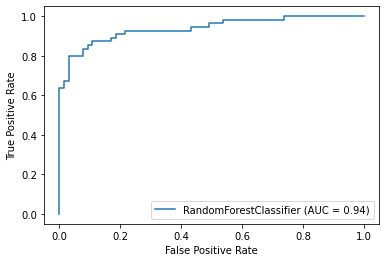

In [189]:
plot_roc_curve(rfc, x_test, y_test)  
plt.show()

<Figure size 432x288 with 0 Axes>

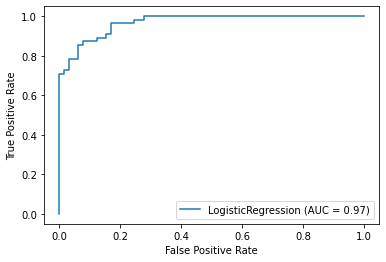

In [190]:
plt.clf()
plot_roc_curve(lr, x_test, y_test)  
plt.show()

<Figure size 432x288 with 0 Axes>

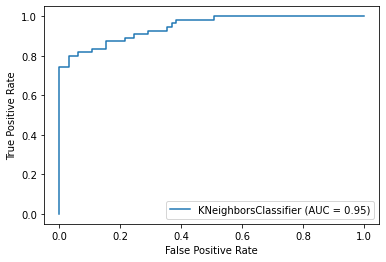

In [191]:
plt.clf()
plot_roc_curve(knn, x_test, y_test)  
plt.show()

<Figure size 432x288 with 0 Axes>

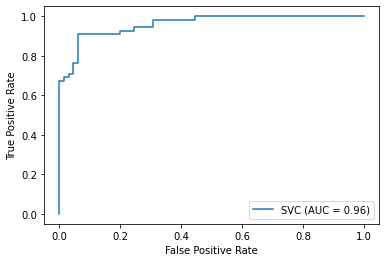

In [192]:
plt.clf()
plot_roc_curve(svc, x_test, y_test)  
plt.show()

## Saving The Models

In [195]:
with open('ml_data/columns_used.txt', 'w') as f:
    for item in list(ml_data.columns.values):
        f.write(f'{item}\n')

In [196]:
pickle.dump(rfc, open('ml_models/rfc', 'wb'))
pickle.dump(lr, open('ml_models/lr', 'wb'))
pickle.dump(knn, open('ml_models/knn', 'wb'))
pickle.dump(svc, open('ml_models/svc', 'wb'))

In [197]:
joblib.dump(scaler, 'std_scaler.bin', compress=True)

['std_scaler.bin']